<h1><center>  lab 13 : Text Summarization </center>
    
<img src="https://miro.medium.com/max/1200/0*kHsYtU2d9IgyFwet.jpg" width="500">


```Created by Jinnie Shin (jinnie.shin@coe.ufl.edu)```\

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmNf86oJnfhpkPA9LnrFnAbfwF2VywPYpB_w&usqp=CAU" align="left" width="70" height="70" align="left"> 

 ### Required Packages or Dependencies

In [1]:
#!pip install { } ! in case you run into the `package not avaialble` error
import pandas as pd 
import numpy as np 


## Dataset
#### Essay Set 10
---
`Prompt`: \
Brandi and Jerry were designing a doghouse. Brandi and Jerry did the following controlled experiment to find out how the color of an object affects its temperature. Use the results from the experiment to describe the best paint color for the doghouse. 
In your description, be sure to:\
•	Choose a paint color. \
•	Describe how that color might affect the inside of the doghouse. \
•	Use results from the experiment to support your description.


> `1. Question`: What is the effect of different lid colors on the air temperature inside a glass jar exposed to a lamp? \
> `2. Hypothesis`: The darker the lid color, the greater the increase in air temperature in the glass jar, as darker colors absorb more energy. \
> `3. Materials`:
glass jar, lamp, four colored lids: {black, dark gray, light gray, and white}, thermometer, meterstick, stopwatch\
> `4. Procedures`:
>> 1.	Put the black lid with the attached thermometer on the glass jar.
>> 2.	Make sure the starting temperature inside the jar is 24° C.
>> 3.	Place lamp 5 centimeters away from the lid and turn on the lamp.
>> 4.	After 10 minutes measure the air temperature inside the glass jar and record as Trial 1.
>> 5.	Turn off lamp and wait until the air in the jar returns to the starting temperature.
>> 6.	Repeat steps 2 through 5 for Trials 2 and 3.
>> 7.	Repeat steps 1 through 6 for the dark gray, light gray, and white lids.
>> 8.	Calculate and record the average air temperature for each lid color. 

> `5. Results`: Lid Colour vs. Air Temperature (Insides Glass Jar After 10 mins (°C)

| Lid Colour |   Trial 1|  Trial 1|   Trial 3| Average|
|------------|----------|----------|----------|----------|
| Black      | `54°C`   |`52°C`   |`54°C`   |`53°C`   |
| Dark gray  | `48°C`   | `48°C`   |`48°C`   | `48°C`   |
| Light gray | `44°C`   |`44°C`   |`46°C`   |`45°C`   |
| White      | `42°C`   | `43°C`   |`41°C`   | `42°C`   |

---
#### Essay Set 10 Data Description

| Type of response            | Source dependent response |
|-----------------------------|---------------------------|
| Grade level                 | `8`                       |
| Subject                     | `Science`                   |
| Total sample size           | `1,640`                     |
| Average length of responses | `60 words`                  |
| Score range                 | `0-2`                       |




In [4]:
df = pd.read_csv('train_rel_2.tsv', sep='\t')
df = df[df['EssaySet'] == 10]
df[:5]

,Id,EssaySet,Score1,Score2,EssayText
15403,25949,10,2,2,black :: black might affect the dog house beca...
15404,25950,10,1,1,white :: White because you wouldn't want the d...
15405,25951,10,2,2,white :: the color white will reflect the suns...
15406,25952,10,1,1,white :: this color will keep the dog house co...
15407,25953,10,2,2,white :: I would use a light color like White ...


<img src="https://i.pinimg.com/736x/2e/aa/7d/2eaa7d5021ca7c3c98bc93b98b9646fe.jpg" align="left" width="70" height="70" align="left">

 ## Task 1: Training data
>  Q1. Let's create a new column, called `color`, in the dataframe `df` that only saves the student's reponses regarding the colour choice (e.g., black, white, ... )  \
Hint: You can use the functions `.split()` and `.apply()`

> Q2: Remove the colour choice response from the `EssayText` column and save it into a new column `response`  \
(e.g., "black :: black might affect the dog ~ " -> "black might affect the dog~")

In [86]:
################################### YOUR CODE HERE for Q2 #############################
df['response'] = df.EssayText.apply(lambda x: x.split('::')[1])
df['answer'] = df.EssayText.apply(lambda x: x.split('::')[0]).apply(lambda x: x.strip())
#######################################################################################
response = df[(df.answer=='black') & (df.Score1 ==2) & (df.Score2 ==2)]
response = response[:20].response

## Step 1: Vectorizer Download

In [70]:
import gensim.downloader
from pprint import pprint # pretty print 
pprint(list(gensim.downloader.info()['models'].keys())) #these are all the list of pre-trained wored embeddings available 

vectorizer = gensim.downloader.load('glove-wiki-gigaword-50') 
# let's use the gensim vectorization trained with gigaword with the dimension of 50
# in order to use this vectorizer (or locate the vector for a particular token ==> vectorizer['TOKEN'] )

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']


In [88]:
# Create a sentence vector using the vectorizer we downloaded 

sentence_vectors = []
for sentence in response:
  v = []
  for word in sentence.split(' '):
    try: 
      v.append(vectorizer[word])
    except:
      v.append(np.zeros(50,))
  sentence_vectors.append(v)

len(sentence_vectors)
sentence_vectors = [np.mean(k, axis=0) for k in sentence_vectors]


In [92]:
# similarity matrix using the cosine similarity 

sim_mat = np.zeros([len(response), len(response)])
from sklearn.metrics.pairwise import cosine_similarity
for i in range(len(response)):
  for j in range(len(response)):
    if i != j:
      #print('Comparing the similarity between')
      #print(response.iloc[i])
      #print(response.iloc[j])
      print('\n')
      sim_mat[i][j] = cosine_similarity(sentence_vectors[i].reshape(1,50), 
                                        sentence_vectors[j].reshape(1,50))[0,0]
print(pd.DataFrame(sim_mat))

























































































































































































































































































































































































































































































































































































































































































































































































          0         1         2         3         4         5         6   \
0   0.000000  0.967159  0.980091  0.976358  0.966593  0.975825  0.967630   
1   0.967159  0.000000  0.973526  0.973227  0.977436  0.986223  0.974064   
2   0.980091

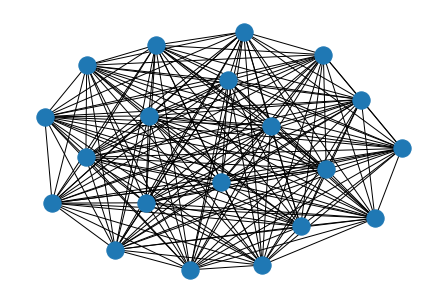

In [102]:
# creating a network using the similarity matrix 

import networkx as nx

nx_graph = nx.from_numpy_array(sim_mat)

scores = nx.pagerank(nx_graph)

nx.draw(nx_graph) #visualize 

In [96]:
ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(response)), reverse=True)

In [98]:
# Specify number of sentences to form the summary
sn = 5

# Generate summary
for i in range(sn):
  print(ranked_sentences[i][1])

  In my oppinion, Brandi and Jerry would want t o paint the doghouse dark gray because it had an average temperature of 48(DEG)C which is the second hottest temperature out of the four lid colors. I think dark gray would be the logical color to paint a dog house because during harsh weather it will keep the dog warm, but during the summer it won't be to uncomfortably hot like black may be.
 I believe that the best color for the dog hou se would be black especially in the winter because it will keep the inside of the dog house warm because the darker the color of the object the greater increase in air temperature inside the object according to th e data table in "Hot Lamp" so the darker the color the warmer t he house or object.
  I think black would be the best color for the doghouse. It will atract more heat inside the doghouse than any other color because in the experiment with the jars, the black lid jar had the warmest inside temperature. This black doghouse will heat up the inside